In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dax.help_functions.get_dax_data import get_data
from dax.help_functions.compute_return import compute_return_h

In [26]:
daxdata = get_data()
for i in range(5):
    daxdata["ret"+str(i+1)] = compute_return_h(daxdata["Close"].values, h=i+1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ret1,ret2,ret3,ret4,ret5
Date,,,,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,-4.966154,NaN,NaN,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,4.057731,-0.908423,NaN,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,0.989967,5.047698,0.081544,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,0.837426,1.827393,5.885123,0.918970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06 00:00:00+01:00,15219.320312,15223.410156,15110.839844,15135.969727,59212500,0.0,0.0,-0.351393,-0.050396,1.415230,2.174844,2.810198
2023-11-07 00:00:00+01:00,15084.790039,15194.530273,15068.250000,15152.639648,62049600,0.0,0.0,0.110074,-0.241319,0.059678,1.525304,2.284918
2023-11-08 00:00:00+01:00,15093.480469,15287.730469,15086.410156,15229.599609,107586700,0.0,0.0,0.506613,0.616686,0.265294,0.566290,2.031917


In [27]:
#quantile levels
tau = [.025, .25, .5, .75, .975]

In [28]:
#define prediction array
#cols are quantile levels, rows are horizons
pred_baseline = np.zeros((5,5))

In [29]:
last_t = 1000

for i in range(5):
    ret_str = "ret"+str(i+1)
    pred_baseline[i,:] = np.quantile(daxdata[ret_str].iloc[-last_t:], q=tau)

pred_baseline

array([[-3.32126527, -0.55138277,  0.05721512,  0.71560012,  2.719772  ],
       [-4.08789496, -0.82324968,  0.07235514,  0.97897714,  3.57049233],
       [-5.25916085, -0.9176545 ,  0.14724672,  1.20953098,  4.62869697],
       [-6.2826288 , -1.04407045,  0.1851562 ,  1.43572122,  5.36739642],
       [-6.73574196, -1.0916465 ,  0.32401418,  1.55300973,  6.25993409]])

Visualize the results

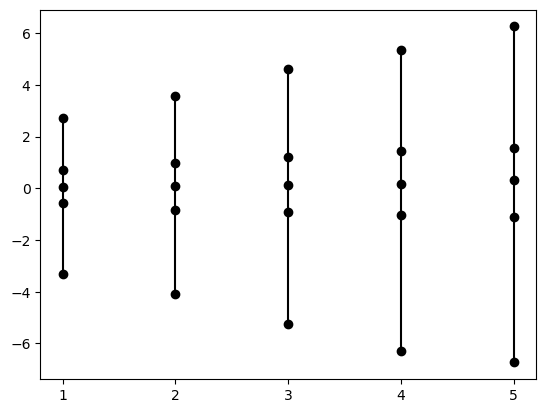

In [30]:
x = np.arange(5)+1
_ = plt.plot(x,pred_baseline, ls="", marker="o", c="black")
_ = plt.xticks(x, x)
_ = plt.plot((x,x),(pred_baseline[:,0], pred_baseline[:,-1]),c='black')

Create Submission DataFrame

In [31]:
df_sub = pd.DataFrame({
    "target": "DAX",
    "horizon": [str(i) + " day" for i in (1,2,5,6,7)],
    "q0.025": pred_baseline[:,0],
    "q0.25": pred_baseline[:,1],
    "q0.5": pred_baseline[:,2],
    "q0.75": pred_baseline[:,3],
    "q0.975": pred_baseline[:,4]})
df_sub

,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,DAX,1 day,-3.321265,-0.551383,0.057215,0.715600,2.719772
1,DAX,2 day,-4.087895,-0.823250,0.072355,0.978977,3.570492
2,DAX,5 day,-5.259161,-0.917655,0.147247,1.209531,4.628697
3,DAX,6 day,-6.282629,-1.044070,0.185156,1.435721,5.367396
4,DAX,7 day,-6.735742,-1.091646,0.324014,1.553010,6.259934


In [28]:
from datetime import datetime
date_str = datetime.today().strftime('%Y%m%d')

In [14]:
#need to change this
PATH = "./path/to/file"

df_sub.to_csv(PATH+"/"+date_str+"DAX_benchmark.csv")

AttributeError: module 'pandas' has no attribute 'to_csv'